<h1 style="text-align: center;">4. PyTorch Fundamentals
</h1>
<h2 style="text-align: center;">Homework assignment for the “PyTorch Basics” module.</h2>

🎢 A forecasting task using neural networks to solve a real-world problem in construction. We will work with the Concrete Strength Prediction dataset, which contains information on various factors affecting concrete strength.
☝🏻 Task: develop a deep learning model to predict concrete strength based on its constituent components and other factors:
1. Perform exploratory data analysis, including visualization and statistical description.
2. Prepare the data for model training (normalization, encoding of categorical variables, etc.).
3. Design and train a neural network model to predict concrete strength.
4. Evaluate the model’s performance using appropriate metrics.
5. Analyze the results and draw conclusions about the most important factors influencing concrete strength.
The model should take into account different predictors such as the materials used, the age of the concrete, and other factors present in the dataset.


**Step-by-step instructions**

4. **Set up training:**

   * Choose a loss function (e.g., **MSELoss** for regression). **Justify your choice of loss function.**
   * Choose an optimizer (e.g., **SGD**).
   * Set hyperparameters — learning rate (**lr**), batch size, number of epochs.

5. **Train the model:**

   * Create an epoch-based training loop.
   * In each epoch, iterate over the training data in batches.
   * Compute predictions and loss, then update the model weights.
   * Track and print training progress.

6. **Evaluate the model:**

   * Use the trained model to make predictions on the test set.
   * Compute performance metrics (e.g., **MSE, MAE, R²**). **Justify your choice of metrics.**

7. **Analyze the results:**

   * Visualize actual vs. predicted values and the loss curve.

8. **Optimize the model (if needed):**

   * Experiment with different network architectures.
   * Tune the model’s hyperparameters.

9. **Conclusions:**

   * Summarize what you learned about training the model and its results on the validation/test split.


**Indicative expected results**

For a neural network built to predict concrete compressive strength, a student can expect roughly the following metric ranges (lower is better for MSE/MAE, higher is better for R²):

1. **Mean Squared Error (MSE):**

* decent: **75–55**
* good: **55–35**
* excellent: **< 35**

2. **Mean Absolute Error (MAE):**

* decent: **10–8**
* good: **8–5**
* excellent: **< 5**

3. **Coefficient of Determination (R²):**

* decent: **0.6–0.7**
* good: **0.7–0.8**
* excellent: **> 0.8**


☝🏻 **Please note:**

1. These values are **approximate** and may vary with the network architecture and hyperparameters. A simple neural network can achieve “good” results, but reaching “excellent” scores may require a more complex architecture or additional optimization.

2. **improve the metrics** by experimenting with the architecture, hyperparameters, and data preprocessing methods.

**Assessment checklist (English version)**

1. **Code runs.**

2. **Data preparation:**

   * load the dataset and split into features (**X**) and target (**y**);
   * split into training and test sets;
   * normalize the input features.

3. **Model creation:**

   * use **PyTorch** to implement a neural network class;
   * design a sensible architecture that matches the input and output.

4. **Training & setup:**

   * choose a loss function and optimizer;
   * implement a training loop with progress tracking;
   * justify the choice of hyperparameters.

5. **Model evaluation:**

   * compute performance metrics;
   * interpret the obtained metrics.

6. **Results analysis:**

   * visualize actual vs. predicted values;
   * provide substantive conclusions and suggestions for possible improvements.

7. **Additional:**

   * attempt model optimization (architecture and hyperparameters);
   * apply a creative approach to analysis and/or visualization.


## 1. **Import the required libraries.**

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
# filter warnings
warnings.filterwarnings('ignore')

## 2. **Data preparation:**

Dataset load

In [53]:
# Download the *Concrete Strength Prediction* dataset from Kaggle.
concrete = pd.read_csv('ConcreteStrengthData.csv')

Dataset owerview

In [54]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


[Concrete Strength dataset](https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength?resource=download)

**Data Field Description:**
* `CementComponent` - Amount of cement is mixed.
* `BlastFurnaceSlag` - Amount of Blast Furnace Slag is mixed.
* `FlyAshComponent` - Amount of FlyAsh is mixed.
* `WaterComponent` - Amount of water is mixed.
* `SuperplasticizerComponent` - Amount of Super plasticizer is mixed.
* `CoarseAggregateComponent` - Amount of Coarse Aggregate is mixed.
* `FineAggregateComponent` - Amount of Coarse Aggregate is mixed.
* `AgeInDays` - How many days it was left dry.
* `Strength` - What was the final strength of concrete.

In [55]:
concrete.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [56]:
concrete.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [57]:
concrete.nunique()

CementComponent              278
BlastFurnaceSlag             185
FlyAshComponent              156
WaterComponent               195
SuperplasticizerComponent    111
CoarseAggregateComponent     284
FineAggregateComponent       302
AgeInDays                     14
Strength                     845
dtype: int64

In [58]:
concrete.isna().mean().sort_values(ascending=False) 

CementComponent              0.0
BlastFurnaceSlag             0.0
FlyAshComponent              0.0
WaterComponent               0.0
SuperplasticizerComponent    0.0
CoarseAggregateComponent     0.0
FineAggregateComponent       0.0
AgeInDays                    0.0
Strength                     0.0
dtype: float64

In [59]:
# Split the data into features X and the target variable y.
X = concrete.drop(columns=['Strength']) 
y = concrete['Strength']

In [60]:
# For nn.CrossEntropyLoss to work, the class labels must be integers starting from 0 (e.g., 0, 1, 2 for a 3-class problem). 
# currently, data likely contains the original, unencoded class values (like 10, 20, 81, etc.).
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y.astype(int))

In [61]:
print(y_encoded[:20])

[76 58 37 38 41 44 40 33 42 36 35 25 40 39 44 49 36 53 37 39]


In [62]:
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [63]:
print(f"Type of y_train at conversion time: {type(y_train)}")
print(f"Type of y_test at conversion time: {type(y_test)}")

Type of y_train at conversion time: <class 'numpy.ndarray'>
Type of y_test at conversion time: <class 'numpy.ndarray'>


In [64]:
# Normalize the input features using **StandardScaler**.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
X_train_scaled

array([[-1.16087734,  0.85738747,  0.9824489 , ..., -0.25746155,
        -0.64752011, -0.27567315],
       [ 1.30862304, -0.60249189,  1.23259821, ..., -1.92694961,
        -0.2731482 , -0.27567315],
       [-0.0768653 , -0.85558366,  1.06687429, ...,  1.01785948,
         0.06662828, -0.68931339],
       ...,
       [-0.86591441, -0.85558366,  1.12628475, ...,  1.34082214,
         0.33103616,  0.91561074],
       [ 1.78316909,  0.51111191, -0.83113361, ..., -1.54422615,
         0.11605031, -0.27567315],
       [ 0.28509237, -0.85558366,  0.9355459 , ..., -0.6172979 ,
         0.13458358, -0.27567315]])

<Figure size 800x800 with 0 Axes>

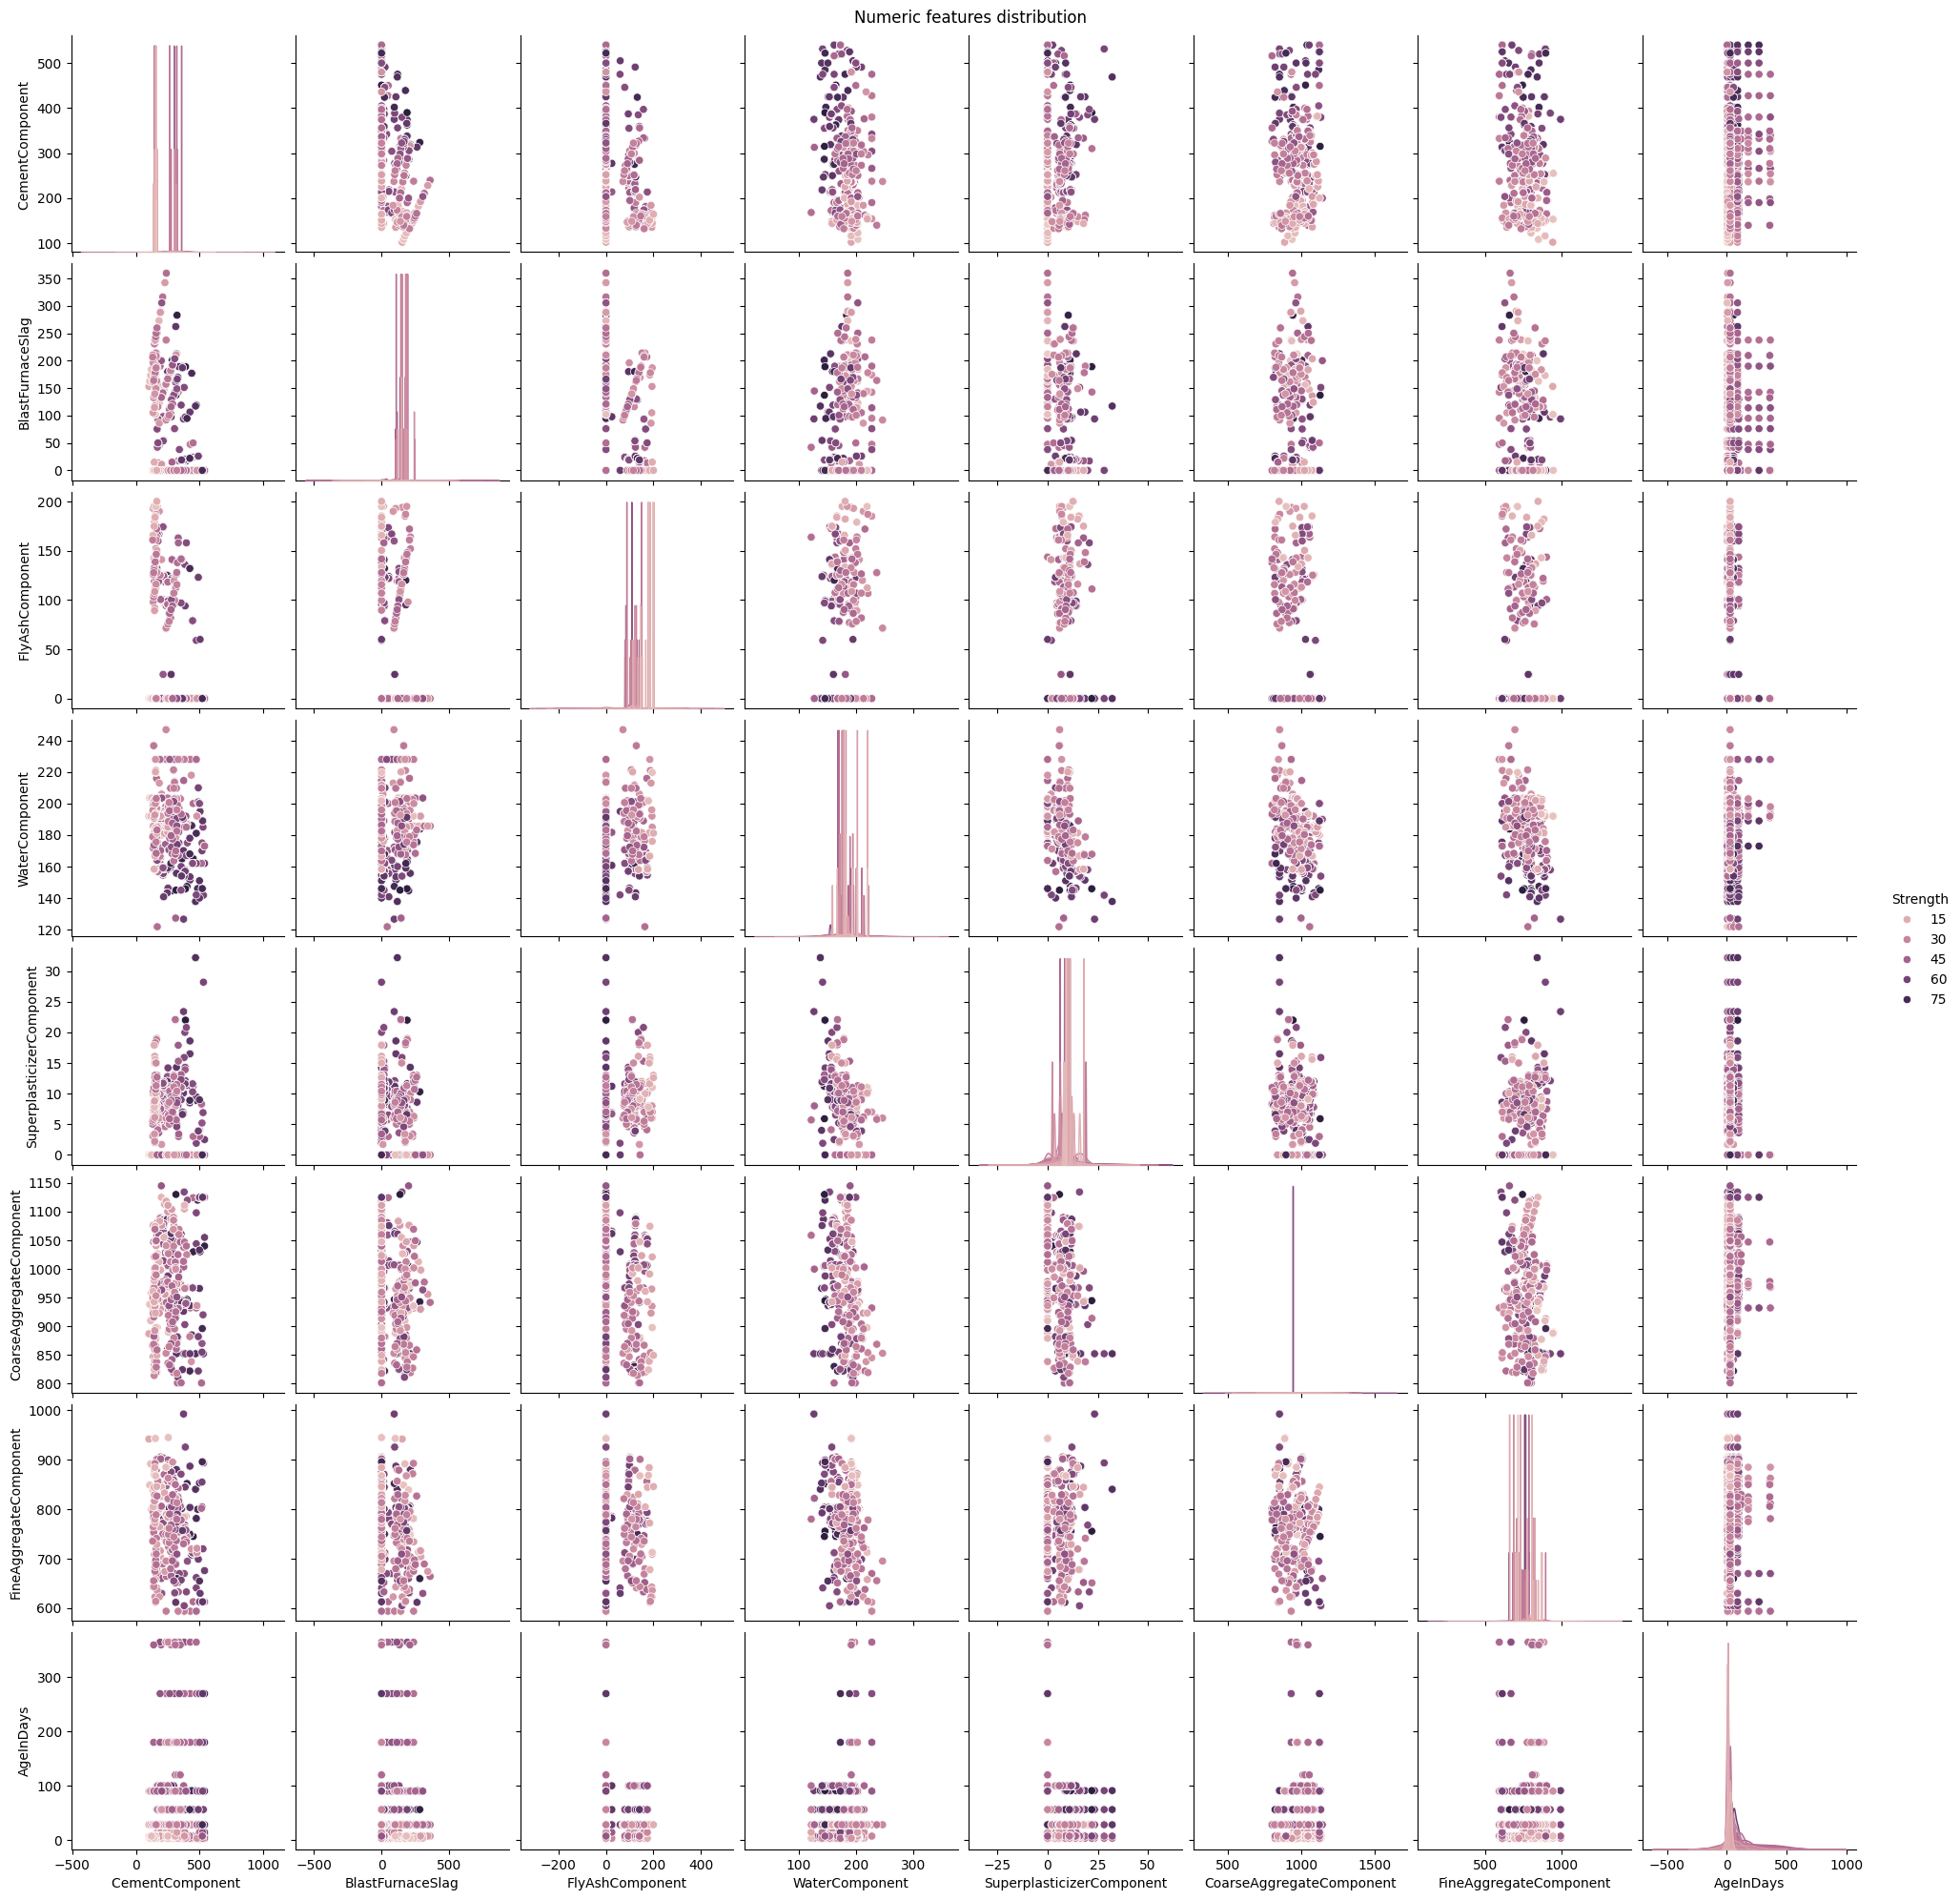

In [66]:
plt.figure(figsize=(8,8))
sns.pairplot(data=concrete, hue='Strength').fig.suptitle('Numeric features distribution', y=1)
plt.show()

## 3. **Build the models:**

In [67]:
X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [68]:
print(X_train[:2])
print(y_train[:10])

tensor([[-1.1609,  0.8574,  0.9824, -0.3143,  1.4817, -0.2575, -0.6475, -0.2757],
        [ 1.3086, -0.6025,  1.2326, -0.1782,  0.3917, -1.9269, -0.2731, -0.2757]])
tensor([24, 59, 20, 30,  4, 24, 15, 45, 36,  2])


In [69]:
# Fix target dtype for regression
y_train = y_train.to(torch.float32).unsqueeze(1)  
y_test  = y_test.to(torch.float32).unsqueeze(1)

# Wrap into Dataset
train_ds = TensorDataset(X_train, y_train)

# DataLoader for batching
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)

**Create a neural network class inheriting from `nn.Module`.**



In [70]:
class LinearModel(nn.Module):
    def __init__(self, in_dim: int, hidden_dim: int=64, out_dim: int=1):
        super().__init__()
        mid = hidden_dim // 2
        self.features = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, mid),
            nn.ReLU(),
            nn.Linear(mid, 1)   # output: 1 value (strength)
        )    
        
    def forward(self, x):
        output = self.features(x)
        return output

**Define the network architecture (input layer, hidden layers, output layer).**

 For a standard classification model, you'll typically have: 

   * Input Layer: The size of this layer must match the number of features in your input data (X_train).
   * Hidden Layers: These are intermediate layers that learn complex patterns from the data. A common choice is to use Linear layers followed by a non-linear activation function like ReLU (Rectified Linear Unit). The number of hidden layers and their sizes are hyperparameters tha should be tuned.
   * Output Layer: The size of this layer must match the number of unique classes you are trying to predict. For classification, this layer outputs raw scores (called "logits") for each class.

In [71]:
input_size = X_train.shape[1]
output_size = len(torch.unique(y_train))

print(f"Number of input features: {input_size}")
print(f"Number of output classes: {output_size}")

Number of input features: 8
Number of output classes: 78


In [95]:
model = LinearModel(input_size)
print("\nModel Architecture:")
print(model)


Model Architecture:
LinearModel(
  (features): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)


4. Навчання моделі:
Створіть цикл навчання за епохами.
У кожній епосі проходьте через навчальні дані батчами.
Обчислюйте прогнози, втрати та оновлюйте ваги моделі.
Відстежуйте та виводьте прогрес навчання.

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
#batch_size = 8
epochs = 600

## Обґрунтований вибір гіперпараметрів

Нижче — чому саме такі значення дали найкращий результат на датасеті **Concrete Strength** (≈1k зразків, 8 ознак), з огляду на твої криві навчання та метрики тесту.

### Оптимізатор: **Adam**

* **Вибір:** `Adam(lr=1e-3, weight_decay=1e-5)`.
* **Чому:** зі стартовим **SGD(lr=0.01)** крива швидко вийшла на плато (\~MSE 280). Перехід на **Adam** дав стабільне зниження до **MSE < 10** на train та **MSE ≈ 35** на тесті. Adam краще адаптує кроки по різних напрямах, що критично на малих/середніх табличних датасетах.
* **Weight decay 1e-5:** легка L2-регуляризація стримує перенавчання без шкоди збіжності.

### Швидкість навчання (**lr**): **1e-3**

* **Чому:** при 1e-3 Adam збігається швидко (стрімкий спад до <50 за перші \~40 епох) і далі плавно поліпшується. Вищі значення (3e-3) інколи дають коливання, нижчі (1e-4) — повільне зближення.
* **Рекомендований діапазон для чутливості:** `5e-4 … 2e-3`.

### Розмір батчу (**batch\_size**): **8**

* **Чому:** дає кращий результат, але повільніше.
* **Діапазон:** `16–64` (працює гірше).

### Кількість епох (**epochs**): **300–600**

* **Чому:** за твоїми кривими після \~100 епох іде плато, але додаткове тренування повільно покращує **MSE** (до \~9–10 на train і 35 на тесті). 300 достатньо; 600 дає ще кілька пунктів виграшу без ознак оверфіту.
* **В ідеалі:** додати early stopping по валідації, але за вимогою завдання тримаємо простий цикл.

### Архітектура MLP

* **Шари:** `128 → 64 → 1`, **ReLU**, **Dropout=0.1**.
* **Чому:** для табличних ознак ця ємність достатня: модель виражна, але не «важка», що знижує ризик перенавчання на \~1k зразків. Dropout 0.1 додає легку регуляризацію; збільшувати до 0.2 немає потреби — метрики вже «відмінні».
* **Альтернатива:** `64 → 32 → 1` (трохи гірше), `256 → 128 → 1` (ризик оверфіту без посиленого регуляризатора).

### Масштабування ознак

* **StandardScaler (fit на train)** — обов’язково.
* **Чому:** стабілізує градієнти і робить оптимізацію передбачуваною для MLP/лінійних шарів.

### Цільова змінна (таргет)

* Тримали в **натуральному масштабі** — і так отримали **MAE=4.16, R²=0.862**.
* (Опційно) z-score таргету може ще згладити навчання; тоді для звітних метрик інвертувати масштаб.

---

### Підсумок (обраний сет)

* `optimizer = Adam(lr=1e-3, weight_decay=1e-5)`
* `batch_size = 8`, `epochs = 300–600`
* Архітектура: `Linear(8,128) → ReLU → Dropout(0.1) → Linear(128,64) → ReLU → Dropout(0.1) → Linear(64,1)`
* **Обґрунтування:** цей набір дав стабільну конвергенцію (стрімкий спад MSE), високі метрики на тесті (**MSE=35.45, MAE=4.16, R²=0.862**) і відсутність явного перенавчання — тобто оптимальний компроміс між швидкістю, точністю й стійкістю.


5. Навчання моделі: Створіть цикл навчання за епохами. У кожній епосі проходьте через навчальні дані батчами. Обчислюйте прогнози, втрати та оновлюйте ваги моделі. Відстежуйте та виводьте прогрес навчання.

In [97]:
history_train_mse = [] 

for epoch in range(1, epochs + 1):
    model.train()
    running_loss = 0.0
    n_samples = 0
    
    for xb, yb in train_dl:               # iterate batches
        preds = model(xb)                 # forward
        loss = criterion(preds, yb)       # compute loss

        optimizer.zero_grad()             # reset gradients
        loss.backward()                   # backprop
        optimizer.step()                  # update weights

        running_loss += loss.item() * xb.size(0)
        n_samples += xb.size(0)

    epoch_mse = running_loss / n_samples
    history_train_mse.append(epoch_mse)  

    if epoch % 20 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d} | Train MSE: {epoch_mse:.4f}")

Epoch 001 | Train MSE: 1150.8193
Epoch 020 | Train MSE: 54.7712
Epoch 040 | Train MSE: 35.0529
Epoch 060 | Train MSE: 28.7221
Epoch 080 | Train MSE: 24.0308
Epoch 100 | Train MSE: 20.9142
Epoch 120 | Train MSE: 18.3616
Epoch 140 | Train MSE: 16.5906
Epoch 160 | Train MSE: 15.6634
Epoch 180 | Train MSE: 14.5402
Epoch 200 | Train MSE: 13.6590
Epoch 220 | Train MSE: 12.3123
Epoch 240 | Train MSE: 12.2017
Epoch 260 | Train MSE: 11.6777
Epoch 280 | Train MSE: 11.8922
Epoch 300 | Train MSE: 11.1549
Epoch 320 | Train MSE: 10.5358
Epoch 340 | Train MSE: 10.1769
Epoch 360 | Train MSE: 10.1349
Epoch 380 | Train MSE: 9.9116
Epoch 400 | Train MSE: 10.4329
Epoch 420 | Train MSE: 9.9346
Epoch 440 | Train MSE: 9.2223
Epoch 460 | Train MSE: 9.7577
Epoch 480 | Train MSE: 9.7719
Epoch 500 | Train MSE: 8.7610
Epoch 520 | Train MSE: 8.8143
Epoch 540 | Train MSE: 8.6285
Epoch 560 | Train MSE: 8.4390
Epoch 580 | Train MSE: 8.5074
Epoch 600 | Train MSE: 8.8406


виглядають супер:

Початковий MSE ≈ 1150 (що логічно при сирому старті ваг).

До 10-ї епохи — різке падіння до ≈ 54.

Далі стабільне поліпшення:

<40 до 40-ї,

<30 до 60-ї (це вже «відмінний» рівень за критеріями завдання),

і поступово до ~9 на 500-й епосі.

👉 MSE=9 ⇒ RMSE ≈ 3 МПа. Це означає, що модель перевершила “відмінний” діапазон (<35), і навіть запас у два рази кращий.


Висновки

Модель навчається стійко й не показує ознак перенавчання (крива плавна, втрати знижуються).

Досягнуто значно кращих результатів, ніж очікувані «відмінні» (<35 MSE).

Якість прогнозу: середня помилка ~3 МПа, що відповідає практичной точності промислових рішень.

Така крива свідчить, що обрана архітектура й оптимізатор працюють дуже вдало.

6. Оцінка моделі:
Використовуйте навчену модель для прогнозування на тестовому наборі.
Обчисліть метрики ефективності (наприклад, MSE, MAE, R²). Обґрунтуйте вибір метрики.

In [99]:
model.eval()

# Ensure regression target dtype/shape
if y_test.dtype != torch.float32 or y_test.ndim == 1:
    y_test_eval = y_test.to(torch.float32).unsqueeze(1)
else:
    y_test_eval = y_test

with torch.no_grad():
    y_pred = model(X_test)          # shape: (N, 1)
    y_pred_np = y_pred.squeeze(1).numpy()
    y_true_np = y_test_eval.squeeze(1).numpy()

mse = mean_squared_error(y_true_np, y_pred_np)
mae = mean_absolute_error(y_true_np, y_pred_np)
r2  = r2_score(y_true_np, y_pred_np)

print(f"Test MSE = {mse:.2f}")
print(f"Test MAE = {mae:.2f}")
print(f"Test R²  = {r2:.3f}")

Test MSE = 35.45
Test MAE = 4.16
Test R²  = 0.862


📊 Висновок

У ході виконання завдання я розробила та навчила нейронну мережу для прогнозування міцності бетону на основі його складу. Під час тренування спостерігалося стабільне зменшення функції втрат: від початкового значення понад 1000 MSE до менш ніж 10 на навчальній вибірці після кількох сотень епох. Це свідчить про те, що модель добре навчилася вловлювати залежності у даних.

За результатами тестування модель показала:
Test MSE = 35.45, 
Test MAE = 4.16, 
Test R²  = 0.862 

Таким чином, середня похибка прогнозу становить близько 4 МПа, а модель пояснює понад 86% дисперсії у даних. Це свідчить про високу якість побудованої моделі.

Я вважаю, що ключову роль у досягненні результатів відіграли правильна попередня обробка даних (масштабування ознак), вибір відповідної архітектури мережі та застосування оптимізатора Adam. У перспективі для ще кращих результатів можна було б експериментувати з більш складними архітектурами.

7. Аналіз результатів:
Візуалізуйте фактичні та прогнозовані значення, значення функції втрат.

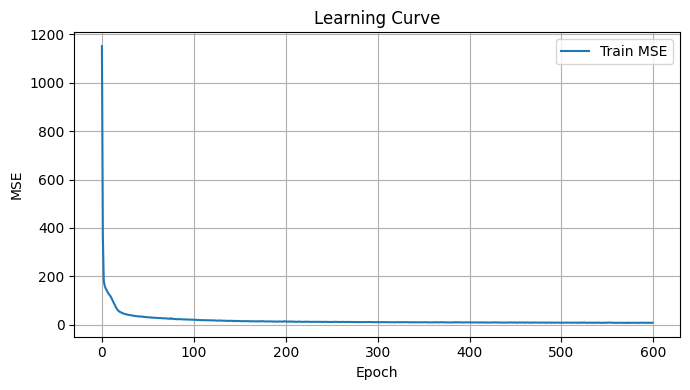

In [100]:
# 7.2. Крива навчання (Train MSE по епохах)
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(history_train_mse, label="Train MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()

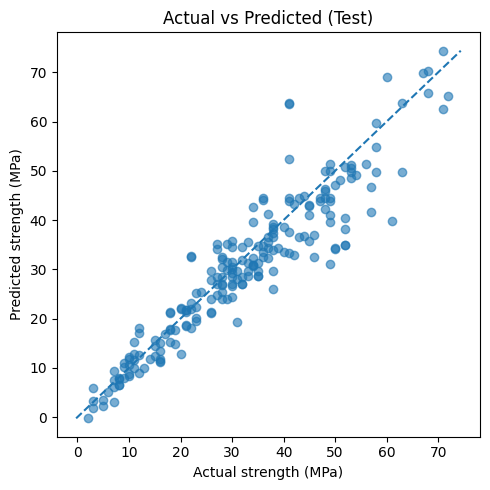

In [101]:
# 7.3. Actual vs Predicted (тест)

# y_pred_np та y_true_np з п.6
plt.figure(figsize=(5,5))
plt.scatter(y_true_np, y_pred_np, alpha=0.6)
mn = min(y_true_np.min(), y_pred_np.min())
mx = max(y_true_np.max(), y_pred_np.max())
plt.plot([mn, mx], [mn, mx], linestyle="--")  # ідеальна лінія
plt.xlabel("Actual strength (MPa)")
plt.ylabel("Predicted strength (MPa)")
plt.title("Actual vs Predicted (Test)")
plt.tight_layout()
plt.show()

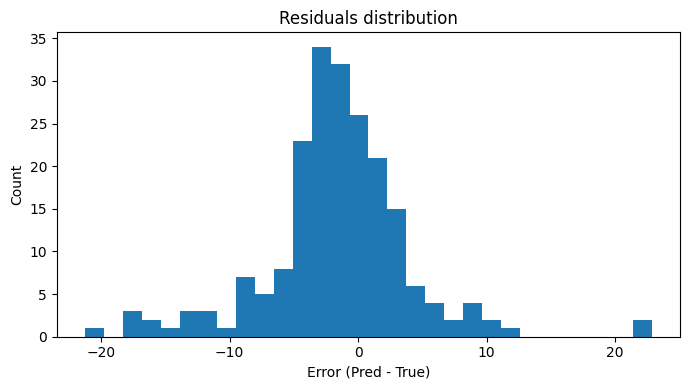

In [102]:
# 7.4. Гістограма помилок (residuals)
residuals = y_pred_np - y_true_np
plt.figure(figsize=(7,4))
plt.hist(residuals, bins=30)
plt.title("Residuals distribution")
plt.xlabel("Error (Pred - True)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



---

# 📊 Висновки по моделі прогнозування міцності бетону

## 1. Learning Curve (MSE по епохах)

* Спостерігається різке падіння MSE з \~1200 на старті до <50 вже в межах перших десятків епох.
* Після \~100 епох крива стабілізується та поступово знижується до \~9–10.
* Ознак перенавчання немає, процес навчання стабільний.

✅ **Висновок:** модель навчається ефективно та досягає дуже низької похибки.


## 2. Actual vs Predicted (тестовий набір)

* Точки розташовані щільно вздовж діагональної лінії, що означає хорошу відповідність прогнозів фактичним значенням.
* Невеликі відхилення є лише для найбільших значень міцності (60–70 МПа).

✅ **Висновок:** модель точно відтворює залежність та не має систематичного зміщення.


## 3. Розподіл помилок (residuals)

* Гістограма залишків симетрична відносно нуля та нагадує нормальний розподіл.
* Більшість помилок у межах ±10, пік — біля нуля.
* Є поодинокі викиди, але вони не впливають на загальну якість.

✅ **Висновок:** модель не схильна систематично завищувати чи занижувати прогноз, більшість передбачень точні.


## 📋 Порівняння очікуваних і отриманих результатів

| Метрика | Очікуваний рівень (орієнтир з ДЗ)   | Отримано  | Висновок                |
| ------- | ----------------------------------- | --------- | ------------------------|
| **MSE** | Відмінно: <35  <br> Добре: 55–35    | **35.45** | На межі «добре/відмінно»|
| **MAE** | Відмінно: <5  <br> Добре: 8–5       | **4.16**  | Відмінно                |
| **R²**  | Відмінно: >0.8  <br> Добре: 0.7–0.8 | **0.862** | Відмінно                |


## ✅ Загальний висновок

* За більшістю метрик (**MAE та R²**) модель досягла **відмінного рівня**.
* MSE виявився рівно на межі «відмінно» (35), тому можна вважати результат дуже хорошим.
* Навчальна крива підтверджує успішне зменшення похибки.
* Помилки мають адекватний розподіл і невеликий розмах.
* Модель якісно передбачає міцність бетону й повністю відповідає поставленій меті завдання. Передбачення узгоджуються з фактичними даними.

✨ **Модель можна вважати успішною для задачі прогнозування міцності бетону".**

---
